#### Uncomment and run the following cell once during the session. This will install all the required libraries used in the notebook.

In [ ]:
#!pip install -r requirements.txt -q


# Introduction to CNNs
The field of computer vision has seen a lot of developments lately. Self-driving cars, object recognition, and object detection are some of the many applications of computer vision, which has seen a lot of progress in the last few years. Convolution Neural Networks, popularly known as CNNs or convnets, have made much of this progress possible. CNNs are a type of deep learning model that have proven to achieve higher accuracy when classifying images than simple neural networks.

Convolutional neural networks were first introduced in the 1980s by [Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun), then a postdoctoral computer science researcher. This network could recognize handwritten digits with a lot of accuracy and found great use in banking and postal services to read zip codes and digits on envelopes and checks, respectively.

![lenet](https://cdn-images-1.medium.com/max/800/1*5m3i2zXwzKqQCEJNOMGetg.png)




Original Image published in [LeCun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-99.pdf)

But what is a CNN, and how does it recognize an image? In this notebook, we shall learn about some of the essential concepts associated with a convolution neural network. Additionally, we shall build a convolutional neural network from scratch and use it to identify items of clothing!


# How Computers Perceive Images&#x2014; Images as Data Points

Unlike humans, computers perceive images as data points. An image is nothing but a standard NumPy array containing pixels of data points. The more pixels in an image, the better its resolution. You can think of pixels as tiny blocks of information arranged in the form of a 2D grid, and the depth of a pixel refers to the color information present in it.

![Images](https://imgur.com/IN8DCOI.png)

https://setosa.io/ev/image-kernels/

Let us now have a look at the representation of the different kinds of images:

- ### Grayscale Image

A grayscale image consists of 8 bits per pixel. This means it can have 256 different shades where 0 pixels represents black while 255 denotes white. For example, the image below shows a grayscale image represented in the form of an array. A grayscale image has only one channel where the channel represents a dimension.

The shape of the given image is:  (512, 512)


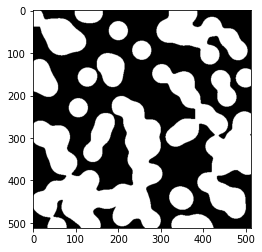

In [13]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.binary_blobs()
plt.imshow(image, cmap='gray')
print(f'The shape of the given image is: ',image.shape)

- ### Colored Image

Colored images are represented as combinations of Red, Blue, and Green pixels, and all the other colors can be achieved by mixing these primary colors in the correct proportions. A colored image also consists of 8 bits per pixel. As a result, 256 different shades of colors can be represented with 0 denoting black and 255 white. Here is an example displaying a colored image.

The shape of the given image is:  (512, 512, 3)


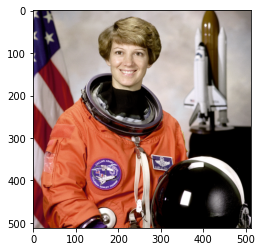

In [7]:
color_image = data.astronaut()
plt.imshow(color_image)
# calculate shape
print(f'The shape of the given image is: ',color_image.shape)

# Convolutions

CNNs apply a series of filters/kernels to the input image; this process is called convolution. The kernels/filters are also matrices (like images) but are of smaller sizes as compared to the images. These filters extract specific features from the input images. For instance, there could be a filter for detecting edges in an image; another for detecting curves, and so on. This is advantageous because it makes the CNN `translation-invariant`, i.e., once learned, a CNN can identify and recognize a pattern anywhere in the image. A specific feature kernel slides over the entire image, and an element-wise product and resultant sum occurs between the kernel and original image, which are essentially matrices. If the portion of the image contains that desired feature, the resultant sum is high. The reverse will happen if the image portion doesn't include the desired feature. 

The following figure will make the concept clear:

![Convolution_schematic.gif](https://imgur.com/8iSHrv0.gif)

source:https://developer.nvidia.com/blog/deep-learning-nutshell-core-concepts/

In the above demonstration, <font color='**green'>Green</font> is the image matrix while <font color='yellow'>Yellow</font> is the applied filter and <font color='pink'>Pink</font> is the convolved or resultant image. We can see that the image's dimension has reduced from **5X5 to 3X3**. This implies that a CNN reduces the size of the image without losing information about the essential features.

#  Convolution Hyperparameters

There are a few parameters that can be tweaked to alter the behavior of a convolutional layer:

- ## Filter Size and the Number of Filters

This refers to the size of the filters that we want to use for the convolution operation. It is a common practice to choose 3X3 or a 5X5 filter, though it can be others too, like 7X7. The depth will be the same as the depth of the previous layer. As far as their numbers are concerned, we usually go for powers of 2, i.e., 16, 32, etc.

- ## Padding

In figure (3) above, we see that the image's dimensions have been reduced from 5X5 to 3X3. Also, we can see that the pixel values that lie along the corners are rarely used. To address this issue, we pad the images before applying the filter. This means we can add a border of 0s (zero-padding, a common choice) around the original image, which ensures that the convolved image is the same as the original image. Let's see it via an example:

![padding](https://imgur.com/l2m6z6J.gif)


In the illustration above, the blue image has been zero-padded, and you can see both the input and output image share the same dimensions: 5X5.

- ## Stride

During the convolution operation, a filter moves over the image. The stride refers to the number of pixels to slide the kernel (filter) across the image. If the stride is one, the filter shall move over one column at a time. When the stride is two, the filter will shift two columns and so on. Larger strides result in shrunken outputs.

![strides](https://imgur.com/n83lQG6.gif)

https://github.com/vdumoulin/conv_arithmetic

---

# Types of Layers in a CNN

## Convolution layer (CONV)

A convolution layer is the layer that consists of the kernels that perform the convolution operations. We have discussed this layer in the section above. 

## Pooling layer (POOL)
The pooling layer downsamples an image. It is generally applied after the conv layer. Pooling means to reduce the size of an image by summarizing regions. During pooling we select the grid, which is the pool size and the stride. Pooling could be either **Max pooling** or **Average pooling**. For instance, if we select a 2X2 grid size, then if we select the pixel with the greatest value in that grid, it would refer to max pooling. However, if we were to average all the values in the grid, that refers to Average Pooling. The diagram below will explain the concept clearly.
As you can see, the resultant image is half the size of the original image. The size can be adjusted through the grid size and the stride number.

![](https://cdn-images-1.medium.com/max/800/1*2WXHo2vaJkaPRegs-G8hLg.png)

## Fully Connected Layer (FC)

The FC layer is often the last few layers in a CNN. It operates on a flattened input. This means the 3D output image of the previous layer is flattened to form a long feature vector and fed into the FC layer.


![Fully_connected_layer](https://imgur.com/INkWd6O.png)

https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks
    
    
Now that we have a basic understanding of a CNN and its various operations, let's begin building one from scratch. The library that we'll be using to implement the CNN is Keras.




---
# Building a CNN to Classify Images of Clothing

Let's now create a CNN which can classify images of clothing like shoes and shirts. We'll use [Keras](https://keras.io/), which is a high-level API of [TensorFlow 2.0](https://www.tensorflow.org/guide/effective_tf2): an approchable, highly productive interface for solving machine learning problems, with a focus on modern deep learning.

## Keras: The Python Deep Learning library
![keras](https://imgur.com/NPcNYBi.png)

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. 

## Installation

Keras comes packaged with TensorFlow 2.0 as `tensorflow.keras`. To start using Keras,we simply install TensorFlow 2.0.


## Importing the Necessary Libraries

In [11]:
from tensorflow import keras
from tensorflow.keras import layers


## 1. Loading the Fashion-MNIST dataset in Keras

The [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset contains 70,000 grayscale images of various clothing items in 10 categories. The images show individual articles of clothing at low resolution (28 $\times$ 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="500">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

There are 10 categories of clothing which have been assigned a label.

![](https://miro.medium.com/max/217/1*CYWtWvXX2-JHg5ugN7J6jQ.png)

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

The Fashion MNIST dataset comes preloaded in Keras in the form of a set of four NumPy arrays.


In [14]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
np.random.seed(42)

The images are encoded as NumPy arrays, and the labels are an array of digits, ranging from 0 to 9. The multidimensional NumPy arrays, in which data is stored, are called Tensors. You can think of tensors as a containers for data. To be more specific, tensors are a generalization of matrices to an arbitrary number of dimensions.

The labels are not included in the dataset so we can create a list of `label_names`.

In [15]:
#creating label names
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Data Exploration
Let us look at the shape of training and testing data.

In [16]:
#Training Data
print(train_images.shape)
print(len(train_labels)) # Total no. of training images

(60000, 28, 28)
60000


In [17]:
#Testing Data
print(test_images.shape)
print(len(test_labels)) # Total no. of testing images

(10000, 28, 28)
10000


In [18]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

* The training data consists of 60,000 images with each image represented by 28X28 pixels
* Likewise, the testing data consists of 10,000 images with each image again represented by 28X28 pixels
* The label for test and train data is an integer between 0 and 9

## 3. Preprocessing the Data
The data must be preprocessed before feeding into the network. Let’s explore an image of the training set.

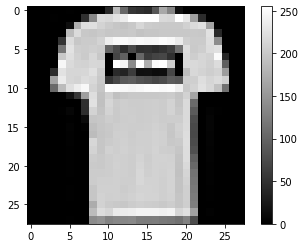

In [19]:
plt.imshow(train_images[1],cmap='gray')
plt.grid(False)
plt.colorbar()
plt.show()

The colorbar shows the pixel intensity fall in the range of 0 to 255.  For the model to work properly, these values need to be normalized to the range [0,1]. We will simply rescale these values to a range of 0 to 1. We also need to reshape the data. This is because the first convolution expects a single tensor of shape- 60,000x28x28x1,

In [20]:
#Rescaling the test and train images

train_images = train_images / 255.0
test_images = test_images / 255.0

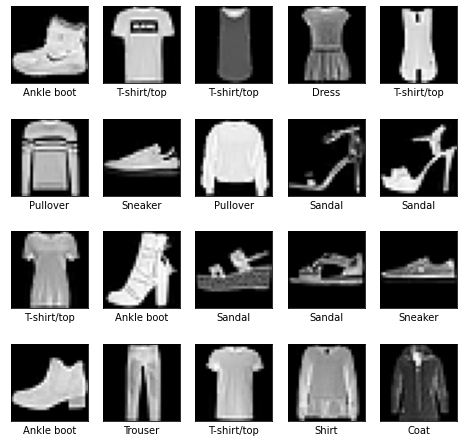

In [21]:
plt.figure(figsize=(8,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')   
    plt.xlabel(label_names[train_labels[i]])

In [22]:
# Reshaping the test and train images

train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 4. Building the Network architecture

We will configure the layers of the model first and then proceed with compiling the model.

#### Layers
A layer is a core building block of a neural network. It acts as a kind of data processing module. Layers extract representations out of the input data that is fed into them. Inherently, deep learning consists of stacking up these layers to form a model. We already learned about the various layers used in a CNN in the section above.

#### Model
A model is a linear stack of layers. It is like a sieve for data processing made of a succession of increasing refined data filters called layers. The simplest model in Keras is sequential, which is built by stacking layers sequentially.

In [23]:
model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2, 2), strides=2),
        #Add another convolution
        keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D((2, 2), strides=2),
        #Flatten the output. 
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])


Calling `model.summary()` to get a summary of the architecture:

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Let's now look at how we defined the model architecture in detail

### Convolution Layer

* We started with a convolutional layer, specifying the number of convolutions that we  want to generate. Here we have chosen '32'. 
* We have also specified the size of the convolutional matrix, in this case a 3X3 grid. We have also used padding to retain the size of the original image.
* We have used `relu` (rectified linear unit) as the activation function. A rectified linear unit has an output of 0 if the input is less than 0, and raw output otherwise. That is, if the input is greater than 0, the output is equal to the input. An activation function is the non-linear transformation that we do over the input signal. [This transformed output is then sent to the next layer of neurons as input](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/).
* Finally, we enter the shape of the input data.

### Pooling Layer

Every convolution layer is then followed by a max-pooling layer. A max-pooling layer will downsample an image but will retain the features.

### Flattened Layer

Finally, we will flatten the images into a one-dimensional vector.

### Dense

This layer consists of a 128-neuron, followed by a 10-node softmax layer. Each node represents a class of clothing. The final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.
We'll also include activation functions in the network to introduce non-linearity. Here we have used ReLU. The last layer is a 10-way softmax layer which will return an array of 10 probability scores. Each score will denote the probability that the current image belongs to one of the 10 given classes.

## 5. Compile the Model

After the model has been built, we enter the compilation phase, which primarily consists of three essential elements:

* Loss Function: loss (Predicted — Actual value) is the quantity that we try to minimize during the training of a neural network.
* Optimizer: determines how the network will be updated based on the loss function.  Optimizers could be the RMSProp optimizer, SGD with momentum, and so on.
* Metrics: to measure the accuracy of the model. In this case, we will use accuracy.

In [24]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## 6. Train the model

It is finally the time to start training, we call the method `model.fit`, i.e., the model is "fit" to the training data.

In [27]:
model.fit(train_images, train_labels, epochs=3,batch_size=32)

Epoch 1/3
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2098 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1794 - accuracy: 0.9337
Epoch 3/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1527 - accuracy: 0.9427


The network will start to iterate on the training data in mini-batches of 32 samples, 5 times over (each iteration over all the training data is called an epoch). At each iteration, the network will compute the gradients of the weights about the loss on the batch, and update the weights. This model quickly reaches an accuracy of about 94% on the training data with just 3 training epochs. 

Note: you can increase or decrease the epochs to adjust the time taken for training.

## 7. Model Evaluation
We evaluate the model’s performance on the test dataset:

In [26]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.2544 - accuracy: 0.9081
Accuracy on test dataset: 0.9081000089645386


The test-set accuracy turns out to be a bit lower than the training set accuracy. But then that is the issue famously known as overfitting in ML terminology. You can avoid it by creating a validation sample of about 10,000 images from the original training data and setting it aside. The testing can be done on this sample since it has not been exposed to the training before.

## 8. Making Predictions
Let us now use the trained model to make predictions on some images.

In [77]:
predictions = model.predict(test_images)

In [78]:
predictions[10]

array([7.9104089e-04, 3.2353448e-04, 5.5448577e-02, 6.3921667e-05,
       9.3117136e-01, 2.7478736e-05, 1.1968215e-02, 7.0903303e-07,
       6.3363404e-05, 1.4188893e-04], dtype=float32)

The prediction is an array of 10 numbers where the numbers represent the probability of different types of clothing. We can also find the label which has the highest probability for the 10th item on the list.

In [79]:
np.argmax(predictions[10])

4

4 corresponds to ‘Coat’. Thus, our model predicts the 10th item to be a coat. Let us check the accuracy of this prediction

In [80]:
test_labels[10]

4

Indeed is it 4, i.e., a ‘Coat.’

# Conclusion

In this notebook we looked at what a CNN is, its various layers, and what the layers mean. We then created a CNN from scratch on the Fashion MNIST dataset to predict the class of the images in the dataset.

## References:

[Deep Learning with Python - Manning](https://www.manning.com/books/deep-learning-with-python)